## PROJECT 3:  Web Scraping and Classification
> Author: Shruthi

### Problem Statement: Model a binary classifier to execute topic modelling

<font color='red'> 
Modus Operandi Overview:
    
I am collecting posts from two sub-reddits: Sports and Politics. This is done by sending a request to reddit's api. Since, the api only allows 25 posts per request a for loop is run to collect over 1000 posts. Once 1000 posts are collected for each of the sub-reddits, the text in the posts are going to be count vectorized which will then be the input into a classifier. A Naive-Bayes classifier is used to train the model and a logistic regression classifier is used to compare the performance.
</font>

Importing libraries

In [1]:
import requests
import time 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

Interacting with reddit's api

In [2]:
url_sports = "https://www.reddit.com/r/sports.json"

In [3]:
headers = {"User-agent":"Shruthi"}

In [4]:
res = requests.get(url=url_sports, headers=headers)

In [5]:
res.status_code

200

In [6]:
js = res.json()

### Gathering Data and EDA for Sports

In [9]:
from pandas.io.json import json_normalize
df = json_normalize(js["data"]["children"])

In [10]:
pd.set_option('display.max_columns', None)


In [11]:
df_sports = df[["data.title","data.author","data.domain","data.name","data.subreddit","data.subreddit_id","data.url"]]
df_sports.head()

,data.title,data.author,data.domain,data.name,data.subreddit,data.subreddit_id,data.url
0,Vintage Gaelic football match between Kerry vs...,noovek,gfycat.com,t3_cgf8wa,sports,t5_2qgzy,https://gfycat.com/insidiousspanishjellyfish
1,HMFT after I score this run...,harambevandecar,v.redd.it,t3_cgpbr9,sports,t5_2qgzy,https://v.redd.it/iajztierjyb31
2,Horton refuses to share medal podium in protes...,Filosig,nbcsports.com,t3_cgaodv,sports,t5_2qgzy,https://www.nbcsports.com/video/mack-horton-re...
3,Eduardo Rodriguez gets a line drive directly i...,Scaulbylausis,i.imgur.com,t3_cgnweh,sports,t5_2qgzy,https://i.imgur.com/B2FbEeW.gifv
4,Manny Pacquiao knocks down Keith Thurman in th...,BP_Ray,gfycat.com,t3_cgempp,sports,t5_2qgzy,https://gfycat.com/eachcharminggoldfinch


Creating a for loop to obtain 1000 posts

In [12]:
posts = []
after = None
for _ in range(40):
    if after == None:
        params={}
    else:
        params = {"after": after}
    url=url_sports
    res = requests.get(url=url, params=params, headers=headers)
    if res.status_code == 200:
        the_json=res.json()
        posts.extend(the_json['data']['children'])
        after = the_json['data']['after']
        df= json_normalize(posts)
        df_sports = df[["data.title","data.author","data.domain","data.name","data.subreddit","data.subreddit_id","data.url"]]
        
    else:
        print(res.status_code)
        break
    time.sleep(1)
        

In [13]:
df_sports

,data.title,data.author,data.domain,data.name,data.subreddit,data.subreddit_id,data.url
0,Vintage Gaelic football match between Kerry vs...,noovek,gfycat.com,t3_cgf8wa,sports,t5_2qgzy,https://gfycat.com/insidiousspanishjellyfish
1,HMFT after I score this run...,harambevandecar,v.redd.it,t3_cgpbr9,sports,t5_2qgzy,https://v.redd.it/iajztierjyb31
2,Horton refuses to share medal podium in protes...,Filosig,nbcsports.com,t3_cgaodv,sports,t5_2qgzy,https://www.nbcsports.com/video/mack-horton-re...
3,Eduardo Rodriguez gets a line drive directly i...,Scaulbylausis,i.imgur.com,t3_cgnweh,sports,t5_2qgzy,https://i.imgur.com/B2FbEeW.gifv
4,Manny Pacquiao knocks down Keith Thurman in th...,BP_Ray,gfycat.com,t3_cgempp,sports,t5_2qgzy,https://gfycat.com/eachcharminggoldfinch
5,Twins produce a triple play in first innings a...,GrantOz44,twitter.com,t3_cglpmt,sports,t5_2qgzy,https://twitter.com/MLB/status/115346076777105...
6,Orlando Pride defender Carson Pickett meets a ...,abesrevenge,i.redd.it,t3_cg07xv,sports,t5_2qgzy,https://i.redd.it/l1w1dvsydjb31.jpg
7,Tim Duncan joins the San Antonio Spurs staff,Redditditditdahdo,espn.com,t3_cgorbw,sports,t5_2qgzy,https://www.espn.com/nba/story/_/id/27239984/d...
8,Swimmer Horton warned over podium snub to rival,nolesfan2011,bbc.com,t3_cgn8uc,sports,t5_2qgzy,https://www.bbc.com/news/world-australia-49079...
9,"Tokyo Olympics 1-Year Out: Scandal, high costs...",IvyGold,apnews.com,t3_cgbna7,sports,t5_2qgzy,https://apnews.com/80972eed8d7f4aec9ceeaebf992...


In [14]:
df_sports.to_csv("df_sports.csv")

### Gathering Data and EDA for Politics

In [15]:
url_politics = "https://www.reddit.com/r/politics.json"

In [17]:
res2 = requests.get(url=url_politics, headers=headers)

In [18]:
js2 = res2.json()

In [21]:
df2 = json_normalize(js2["data"]["children"])

In [22]:
df2 = df2[["data.title","data.author","data.domain","data.name","data.subreddit","data.subreddit_id","data.url"]]
df2.head()

,data.title,data.author,data.domain,data.name,data.subreddit,data.subreddit_id,data.url
0,"The ""What happened in your state last week?"" M...",optimalg,self.politics,t3_cgf55b,politics,t5_2cneq,https://www.reddit.com/r/politics/comments/cgf...
1,A Dallas-born citizen picked up by the Border ...,pinkjunglegym,dallasnews.com,t3_cglurx,politics,t5_2cneq,https://www.dallasnews.com/news/immigration/20...
2,House Oversight schedules Thursday vote to hol...,Ken808,thehill.com,t3_cgjyto,politics,t5_2cneq,https://thehill.com/homenews/house/454211-hous...
3,The Cop Who Said AOC “Needs A Round” Just Got ...,recycleaccount38,news.vice.com,t3_cgjj8p,politics,t5_2cneq,https://news.vice.com/en_us/article/qv77b3/the...
4,"15,000 Americans Died So Republican Governors ...",Eleganty,esquire.com,t3_cgj9xk,politics,t5_2cneq,https://www.esquire.com/news-politics/politics...


In [23]:
posts2 = []
after = None
for _ in range(40):
    if after == None:
        params={}
    else:
        params = {"after": after}
    url2 = url_politics
    res2 = requests.get(url=url2, params=params, headers=headers)
    if res2.status_code == 200:
        js=res2.json()
        posts2.extend(js['data']['children'])
        after = js['data']['after']
        df= json_normalize(posts2)
        df_politics = df[["data.title","data.author","data.domain","data.name","data.subreddit","data.subreddit_id","data.url"]]
        
    else:
        print(res.status_code)
        break
    time.sleep(1)
        

In [24]:
df_politics

,data.title,data.author,data.domain,data.name,data.subreddit,data.subreddit_id,data.url
0,"The ""What happened in your state last week?"" M...",optimalg,self.politics,t3_cgf55b,politics,t5_2cneq,https://www.reddit.com/r/politics/comments/cgf...
1,A Dallas-born citizen picked up by the Border ...,pinkjunglegym,dallasnews.com,t3_cglurx,politics,t5_2cneq,https://www.dallasnews.com/news/immigration/20...
2,House Oversight schedules Thursday vote to hol...,Ken808,thehill.com,t3_cgjyto,politics,t5_2cneq,https://thehill.com/homenews/house/454211-hous...
3,The Cop Who Said AOC “Needs A Round” Just Got ...,recycleaccount38,news.vice.com,t3_cgjj8p,politics,t5_2cneq,https://news.vice.com/en_us/article/qv77b3/the...
4,"15,000 Americans Died So Republican Governors ...",Eleganty,esquire.com,t3_cgj9xk,politics,t5_2cneq,https://www.esquire.com/news-politics/politics...
5,"Citing Intense Public Interest, Judge Unseals ...",koavf,theintercept.com,t3_cgleyr,politics,t5_2cneq,https://theintercept.com/2019/07/22/citing-int...
6,Report: Rudy Giuliani is running a backchannel...,drsleep007,salon.com,t3_cghvug,politics,t5_2cneq,https://www.salon.com/2019/07/22/report-rudy-g...
7,Almost 80 percent of college students think Tr...,Pomp_N_Circumstance,newsweek.com,t3_cghi1x,politics,t5_2cneq,https://www.newsweek.com/donald-trump-robert-m...
8,The media is getting second chance to cover Ro...,randalflagg,washingtonpost.com,t3_cggfyi,politics,t5_2cneq,https://www.washingtonpost.com/lifestyle/style...
9,India Calls Out Trump Lie That He Was Asked To...,TrumpSharted,huffpost.com,t3_cgm9yh,politics,t5_2cneq,https://www.huffpost.com/entry/trump-kashmir-i...


In [25]:
df_politics.to_csv("df_politics.csv")

In [57]:
df_sports.columns

Index(['data.title', 'data.author', 'data.domain', 'data.name',
       'data.subreddit', 'data.subreddit_id', 'data.url'],
      dtype='object')

In [26]:
df_politics.columns

Index(['data.title', 'data.author', 'data.domain', 'data.name',
       'data.subreddit', 'data.subreddit_id', 'data.url'],
      dtype='object')

## Features

Combining the two dataframes to create a feature dataframe

In [27]:
frames = [df_sports,df_politics]

In [28]:
final_df = pd.concat(frames, ignore_index=True)

In [29]:
final_df

,data.title,data.author,data.domain,data.name,data.subreddit,data.subreddit_id,data.url
0,Vintage Gaelic football match between Kerry vs...,noovek,gfycat.com,t3_cgf8wa,sports,t5_2qgzy,https://gfycat.com/insidiousspanishjellyfish
1,HMFT after I score this run...,harambevandecar,v.redd.it,t3_cgpbr9,sports,t5_2qgzy,https://v.redd.it/iajztierjyb31
2,Horton refuses to share medal podium in protes...,Filosig,nbcsports.com,t3_cgaodv,sports,t5_2qgzy,https://www.nbcsports.com/video/mack-horton-re...
3,Eduardo Rodriguez gets a line drive directly i...,Scaulbylausis,i.imgur.com,t3_cgnweh,sports,t5_2qgzy,https://i.imgur.com/B2FbEeW.gifv
4,Manny Pacquiao knocks down Keith Thurman in th...,BP_Ray,gfycat.com,t3_cgempp,sports,t5_2qgzy,https://gfycat.com/eachcharminggoldfinch
5,Twins produce a triple play in first innings a...,GrantOz44,twitter.com,t3_cglpmt,sports,t5_2qgzy,https://twitter.com/MLB/status/115346076777105...
6,Orlando Pride defender Carson Pickett meets a ...,abesrevenge,i.redd.it,t3_cg07xv,sports,t5_2qgzy,https://i.redd.it/l1w1dvsydjb31.jpg
7,Tim Duncan joins the San Antonio Spurs staff,Redditditditdahdo,espn.com,t3_cgorbw,sports,t5_2qgzy,https://www.espn.com/nba/story/_/id/27239984/d...
8,Swimmer Horton warned over podium snub to rival,nolesfan2011,bbc.com,t3_cgn8uc,sports,t5_2qgzy,https://www.bbc.com/news/world-australia-49079...
9,"Tokyo Olympics 1-Year Out: Scandal, high costs...",IvyGold,apnews.com,t3_cgbna7,sports,t5_2qgzy,https://apnews.com/80972eed8d7f4aec9ceeaebf992...


In [30]:
final_df.columns

Index(['data.title', 'data.author', 'data.domain', 'data.name',
       'data.subreddit', 'data.subreddit_id', 'data.url'],
      dtype='object')

In [31]:
final_df.shape

(1970, 7)

In [32]:
final_df.to_csv("combined_df.csv")

Creating my feature column

In [33]:
final_df['politics'] = final_df["data.subreddit"].map(lambda x:1 if x== "politics" else 0)

Creating X and Y

In [35]:
X = final_df["data.title"]
y = final_df["politics"]

Splitting into Train and Test sets

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=123,stratify=y)

## Modelling

Running the count Vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
cvec = TfidfVectorizer(max_features=1000, stop_words="english")
cvec.fit(X_train)
X_train_cvec = pd.DataFrame(cvec.transform(X_train).todense(),
             columns=cvec.get_feature_names())
X_train_cvec.head()

,000,000m,09,10,100,105,10th,11,120,15,17,170,19,1958,1992,1st,20,200,2016,2019,2020,2021,21,22,23,24,25,27,29,2nd,31,32,400,400m,50,57,5m,75,90,absolutely,abuse,accident,accused,adam,administration,advance,advances,adversity,afcon,afghanistan,africa,age,agent,ago,ahead,air,al,alex,alexander,alexandria,algeria,allegations,alleged,allowed,alpes,altidore,america,american,americans,amp,andré,angeles,angels,announce,announces,annual,anthony,anti,antoine,aoc,ap,argentina,arizona,arkansas,arm,arms,arnold,arrested,ashley,asia,asked,assignment,associate,asylum,athlete,atletico,attack,attacks,audience,australia,australian,avoid,away,bad,ball,ban,baseball,batard,beat,beats,belgium,ben,bernie,best,bet,betsy,bid,biden,birthday,black,blows,bluegrass,bonuses,border,boston,bowl,boxer,breakdances,breaks,brian,bribery,brilliant,bring,british,broadcast,broken,brooklyn,budget,bull,buttigieg,buy,california,called,calling,calls,came,cameron,campaign,camps,candidate,candidates,capture,car,care,carrying,cars,carson,case,catch,catches,caught,cause,caused,cbs,ceiling,celebrate,celebrating,center,certain,chair,chamonix,champion,champions,championship,championships,chan,change,changers,changes,chant,chants,check,chelsea,chestnut,chief,child,china,chinese,chris,christian,cia,citizenship,city,claims,clear,clippers,close,club,coach,coke,college,color,comes,coming,commission,concacaf,confirms,confused,congratulations,congress,congressional,congresswomen,conservative,conservatives,considered,contest,continues,controversy,cori,cork,cornhole,cortez,country,cowardly,crash,cricket,crimes,criticism,critics,crowd,cup,dan,dangerous,das,day,days,daytona,deal,death,debt,decided,defeat,defeats,defending,defends,demand,democrat,democratic,democrats,department,deport,describes,designate,details,diamond,didn,died,dies,division,djokovic,dodgers,does,doesn,dog,doj,dolphins,domestic,don,donald,donation,dos,doubt,douglas,draft,driver,drop,drops,drug,ducking,durant,dutch,early,earns,eating,economic,edition,election,eligible,elizabeth,end,ended,ends,england,english,ensues,epa,epstein,era,espn,ethics,ethiopian,eurobasket,europe,european,event,evidence,explained,extensive,face,facebook,fake,false,family,fan,fans,fascist,fastest,fc,federal,federer,feelings,fence,ferns,field,fifa,fight,fighter,files,final,finals,financial,fined,finishes,finishing,fired,flag,flashing,flick,food,foot,football,formula,forward,foul,fox,france,frank,franken,free,freeze,friday,friend,friends,funny,futami,g7,gaelic,game,games,gasly,gauff,gebrhiwet,generous,george,georgia,ger,germany,gets,getting,giants,girl,giuliani,gives,goal,goalie,goals,goes,going,gold,golden,golf,good,gop,got,gov,government,governor,grand,grappling,greatest,green,griezmann,group,groups,guard,gun,hagos,haley,half,halladay,hamilton,hand,hands,happened,happy,hard,hardaker,harris,harvey,hat,hate,hawk,head,health,hear,hearing,heartbreak,heat,heel,hell,help,high,hill,hima,hiroshi,history,hit,hits,hold,hollywood,home,hong,honor,hope,horton,host,hosted,hosting,hot,house,houston,huge,human,icc,ice,ilhan,illinois,immigrants,immigration,impaled,impeach,impeachment,implicate,impressive,incident,increase,independent,india,industry,injures,insane,inside,install,intelligence,interactive,international,intervenes,interview,investigate,investigation,iran,iranian,issues,italian,jackie,james,japanese,jeffrey,jerseys,jews,jihad,jimmy,joe,joey,johnny,johnson,joins,jonathan,josh,jozy,jr,judge,judiciary,junior,just,justice,justin,kaepernick,kamala,kawhi,keeps,keith,kendrick,kentucky,kerry,kevin,key,kick,kicked,kids,kill,killed,knee,knock,knocks,know,kobe,kong,korea,kyrie,la,labor,lacrosse,lampard,lanka,lap,late,latest,law,lawmaker,lawmakers,lawyers,lbs,le,lead,leaders,leading,league,leak,leave,left,legendary,lehmann,leonard,let,lewis,lhw,library,lie,life,lightning,lights,like,limbo,limit,line,lineman,lineup,list,lithuanian,live,london,long,look,los,losing,loss,louis,louisiana,love,lucroy,lussi,machine,madrid,major,make,makes,making,man,manager,manny,map,mar

In [39]:
X_train_cvec.shape

(1477, 1000)

In [40]:
X_train_cvec.to_csv("count_vectorized.csv")

In [41]:
X_test_cvec = cvec.transform(X_test)

## Naive Bayes Model

In [42]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
model = nb.fit(X_train_cvec,y_train)

In [43]:
predictions = nb.predict(X_test_cvec)

Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 240
False Positives: 6
False Negatives: 4
True Positives: 243


In [45]:
cross_val_score(nb,X_train_cvec,y_train,cv=10).mean()

0.9695438449352345

## Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train_cvec,y_train)
pred = logreg.predict(X_test_cvec)

C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
cross_val_score(logreg,X_train_cvec,y_train,cv=10).mean()

C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

0.9675214143413754

In [48]:
predictions2 = logreg.predict(X_test_cvec)

In [49]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions2).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 246
False Positives: 0
False Negatives: 14
True Positives: 233


### Naive Bayes Model Accuracy: 96.9%
### Logistic Regression Model Accuracy: 96.7%

### Conclusion:
#### Despite both the models having the same accuracy, Logistic Regression performs better compared to Naive Bayes 

## Word Cloud for Sports

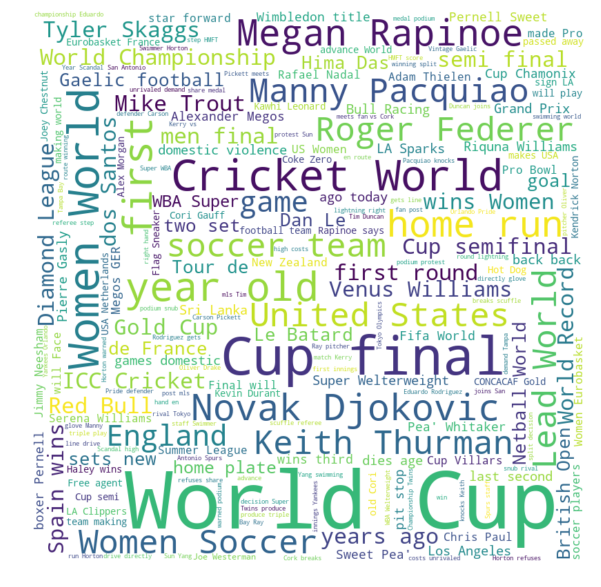

In [74]:
text = " ".join(word for word in df_sports["data.title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, stopwords=stopwords,min_font_size = 8, background_color="white").generate(text)


# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()


## Wordcloud for Politics

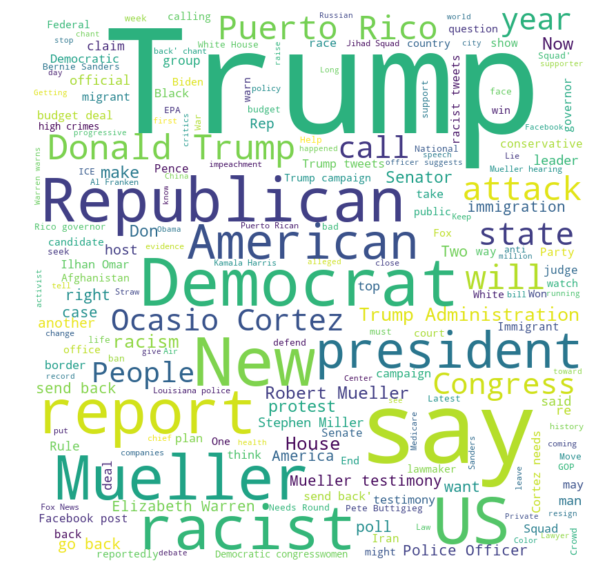

In [75]:
text = " ".join(word for word in df_politics["data.title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, stopwords=stopwords,min_font_size = 10, background_color="white").generate(text)


# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

 

Conclusion: TRUMP RULES THE WORLD!
Just Kidding


CONCLUSION



This model is built to differentiate whether a post belongs to the Sports topic or the politics topic and has achieved that.



According to the Word Clouds, the current hot-topic in the sports sub-reddit is the Cricket World Cup. The current hot-topic in the politics sub-reddit is Trump as usual, Republicans vs Democrats so a conclusion would be that American Politics does really affect the world.



The data keeps getting updated everytime the website is refreshed, hence everytime the request is made a new dataset is obtaine. This makes a steady training set unavailable to train the models and it affects the words the count vectorizer is fit to. This affects the performance of the models. A constant backed up data on the api would improve the fit of the count-vectorizer and hence train a steadier classifier. Never the less, the word clouds prove that the words have been clearly differentiated.
